# Case Study on Correlation and Regression

A textile company regularly spent money on five advertising companies for their 
ads. (Dataset added along with)

**1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.**

**2. Build a regression model to predict the profit from the given data and comment your findings on it.**

**3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.**

- Add1(in Thousands) 290
- Add2(in Thousands) 312
- Add3(in Thousands) 309
- Add4(in Thousands) 298
- Add5(in Thousands) 320

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
#reading dataset
df = pd.read_csv("Add_sales_data_2018.csv")

In [3]:
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
df.tail()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444
204,2017-12-08,287.55,289.90,285.05,288.05,288.45,5421.842


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [6]:
df.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

**Data Understanding:**

* Data set showing the details of amount spend on 5 different advertisement companies with profit.
* There are 7 features in total.
* Six features are float data-type with 64 bit and one feature is a object datatype.

## 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

### Correlation Matrix

<AxesSubplot:>

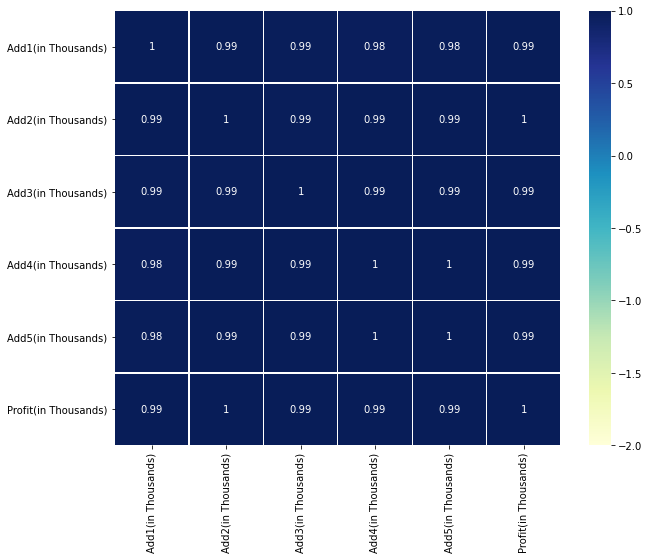

In [7]:
corrmatrix = df.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix,vmin=-2,vmax=1,annot=True,linewidths=0.2,cmap='YlGnBu')

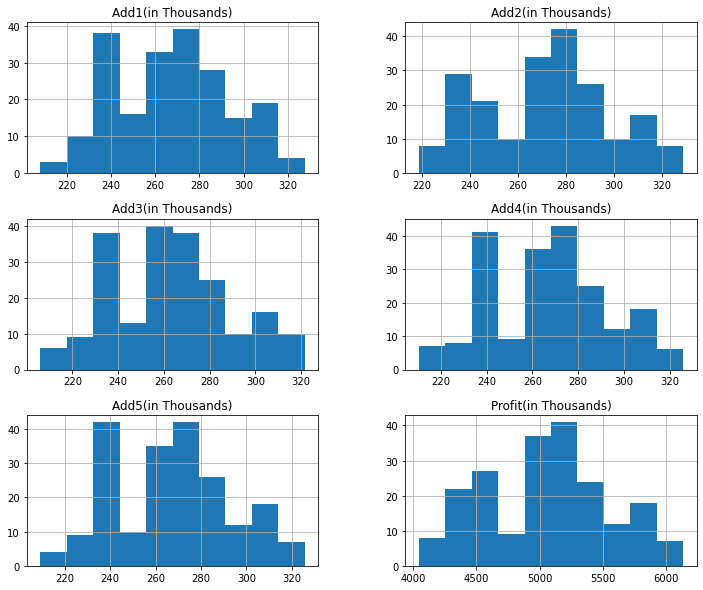

In [8]:
graph = df.select_dtypes(include=['int32','int64','float'])
graph.hist(figsize=(12,10))
plt.show()

In [9]:
df.corr()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


**Findings**

* The correlation matrix shows that there is high postivive correlation between the amount spent for advertising through five different companies and profit generated.
* Advertising comapany 2 had a perfect correlation with the profit.
* Other advertising comapnies had a highly strong correalation with profit having a correaltion of 0.99 for each.

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [10]:
df.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

**Feature Reduction**

Dimensionality Reduction is the process of reducing the number of features or variables in the dataset. It is the transformation of data from a high-dimensional space into a low-dimensional representaion retains some meaningful properties of the original data.
- In this dataset we have 5 features('Add1(in Thousands)', 'Add2(in Thousands)','Add3(inThousands)''Add4(inThousands)','Add5(in Thousands) having high positive correalation with the target variable(profit).
- In order to get a better model we reduce some of the features from the dataset.

In [11]:
#By considering low correlaton drop 'Add5(in Thousands)' feature and drop 'Date' column (string value) from the dataset.
df1 = df.drop(['Date','Add5(in Thousands)'],axis=1)

**Correlation Matrix after feature reduction**

<AxesSubplot:>

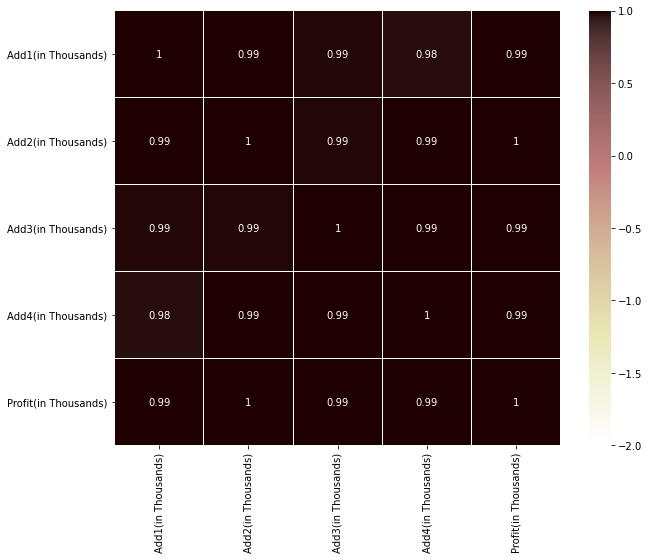

In [35]:
corrmatrix = df1.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix,vmin=-2,vmax=1,annot=True,linewidths=0.2,cmap='pink_r')

In [33]:
df1.corr()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.993346
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,1.000000


In [13]:
y = df1['Profit(in Thousands)']
x = df1.drop(['Profit(in Thousands)'],axis=1)

In [14]:
#deataset shape after feature reduction
x.shape

(205, 4)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)

In [16]:
lr = linear_model.LinearRegression()

In [17]:
model = lr.fit(x_train,y_train)

In [18]:
predictions = model.predict(x_test)

In [19]:
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 0.538164044375497


**Findings**

In this model the mean squared error is 0.538, so it is a low error model. If the error is zero then that model is considered as the best fit model.

In [20]:
model.intercept_

-0.1951707349599019

In [21]:
model.coef_

array([ 0.97317652, 12.43994559,  3.54702319,  1.8201929 ])

In [22]:
#dataset after feature reduction
x.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands)
0,208.00,222.25,206.85,216.00
1,217.00,218.60,205.90,210.25
2,223.50,227.80,216.15,217.25
3,230.00,237.50,225.75,226.45
4,234.55,234.60,221.05,230.30


# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
- Add1(in Thousands) =290
- Add2(in Thousands) =312
- Add3(in Thousands) =309
- Add4(in Thousands) =298
- Add5(in Thousands) =320

**Profit prediction in feature reduction model**

In [23]:
predictions = model.predict(x_test)

In [24]:
#profit prediction with new input values.
make_pred1=[[290.00, 312.00, 309.00, 298.00]]
model.predict(make_pred1).item()

5801.736693174623

**Findings**

The predicted profit amount of the feature reduction model is 5801.736(in thousands)

**Profit prediction without feature reduction model**

In [25]:
#Model cannot accept string value so we drop the 'Date' column from the dataset
df2 = df.drop(['Date'],axis=1)

In [26]:
a = df2['Profit(in Thousands)']
b = df2.drop(['Profit(in Thousands)'],axis=1)

In [27]:
b.shape

(205, 5)

In [28]:
b_train,b_test,a_train,a_test = train_test_split(b,a,random_state=42,test_size=0.25)

In [29]:
model = lr.fit(b_train,a_train)

In [30]:
predictions = model.predict(b_test)

In [31]:
#profit prediction with new input values.
make_pred=[[290.00, 312.00, 309.00, 298.00, 320.00]]
model.predict(make_pred).item()

5820.06

**Findings**

The predicted profit amount without feature reduction model is 5820.06(in thousands)

In [32]:
#END